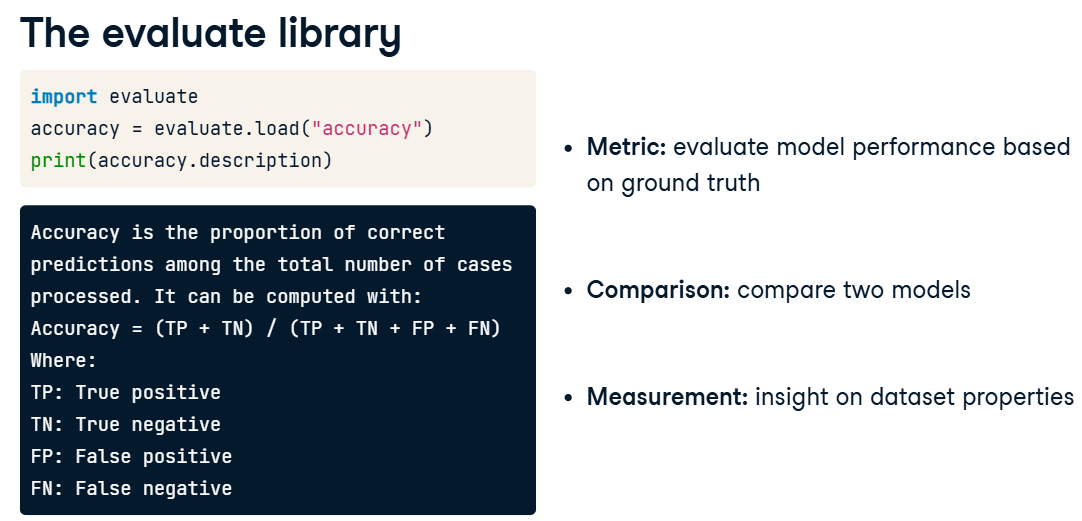

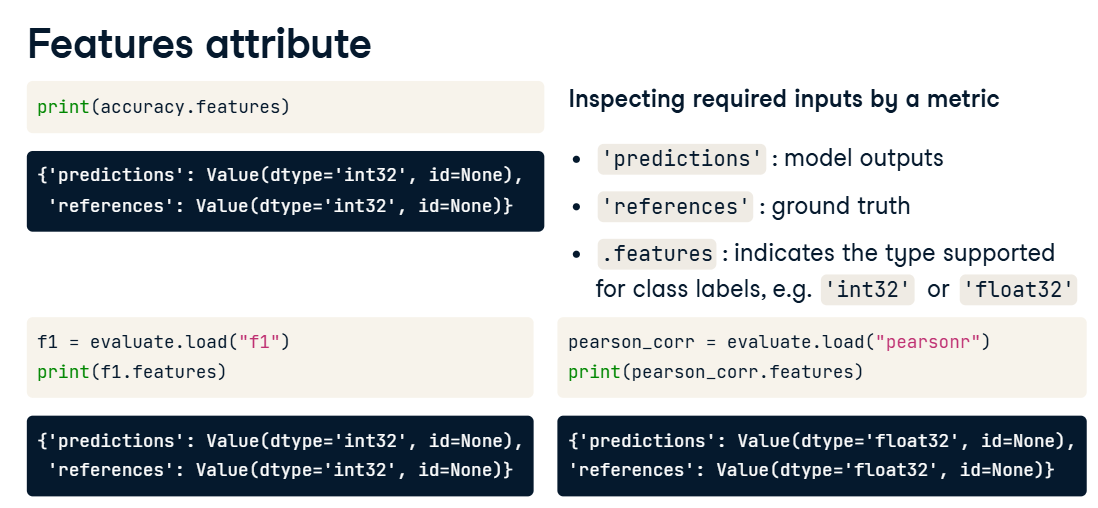

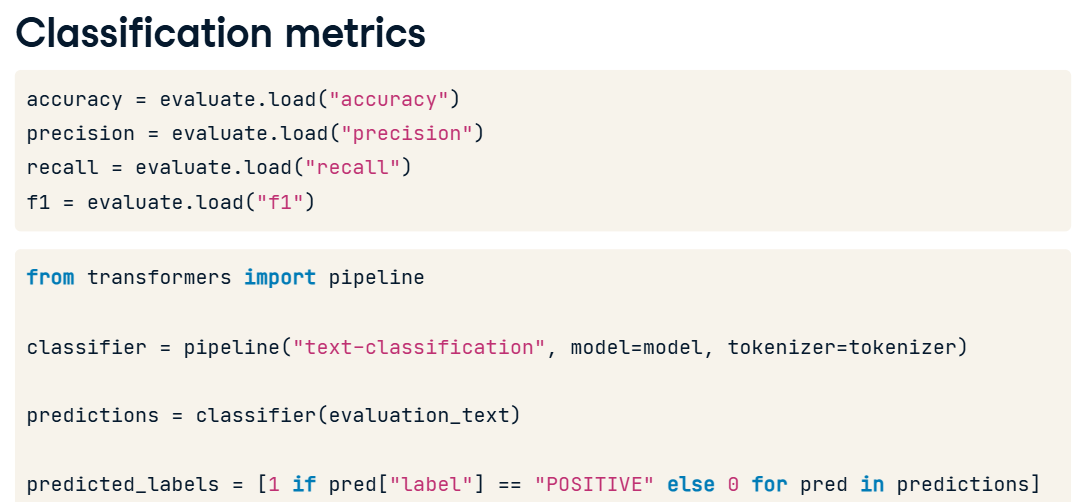

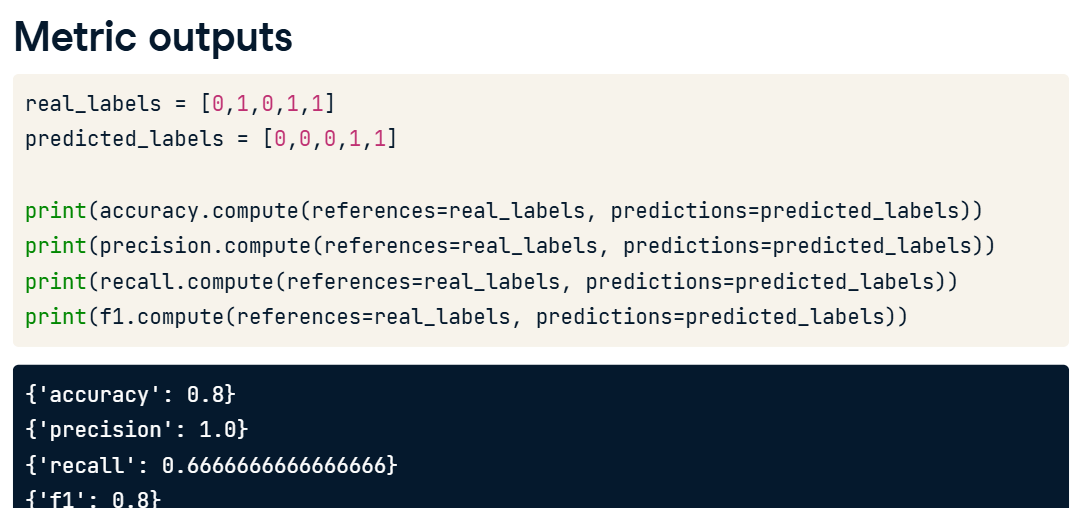

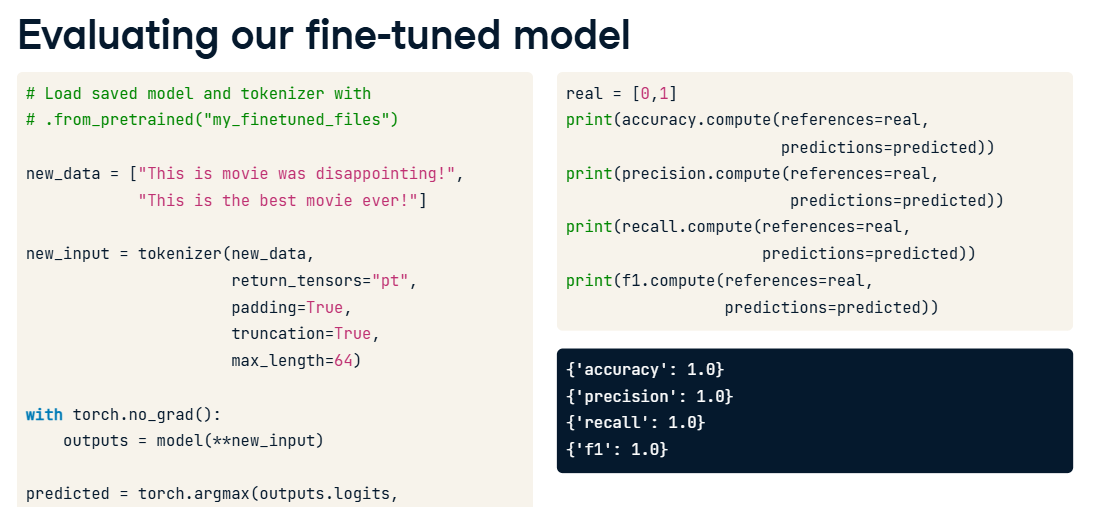

In [ ]:
# Load the metrics
accuracy = evaluate.load("accuracy")
precision = evaluate.load("precision")
recall = evaluate.load("recall")
f1 = evaluate.load("f1")

In [ ]:
torch.argmax(outputs.logits, dim=1).tolist() #tahmin degerleri değişkene atmak.

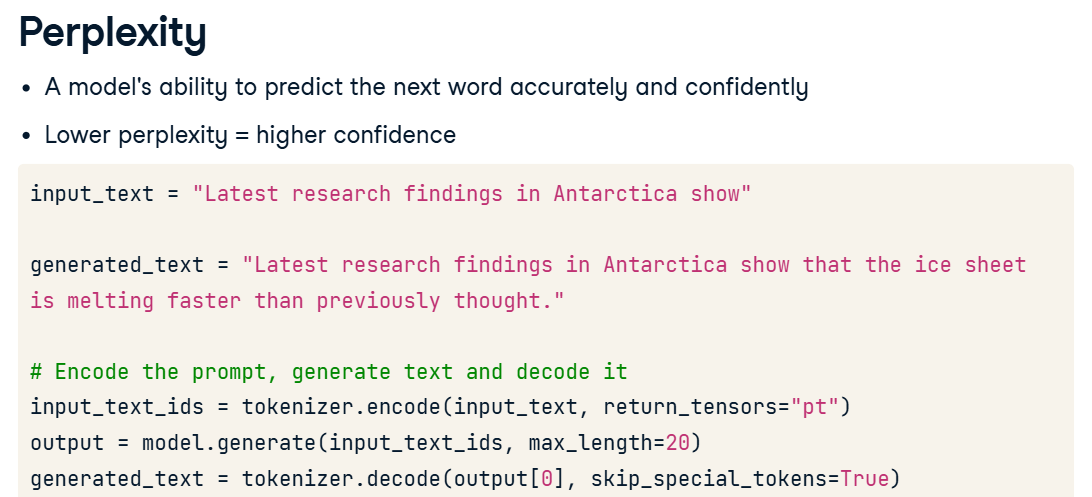

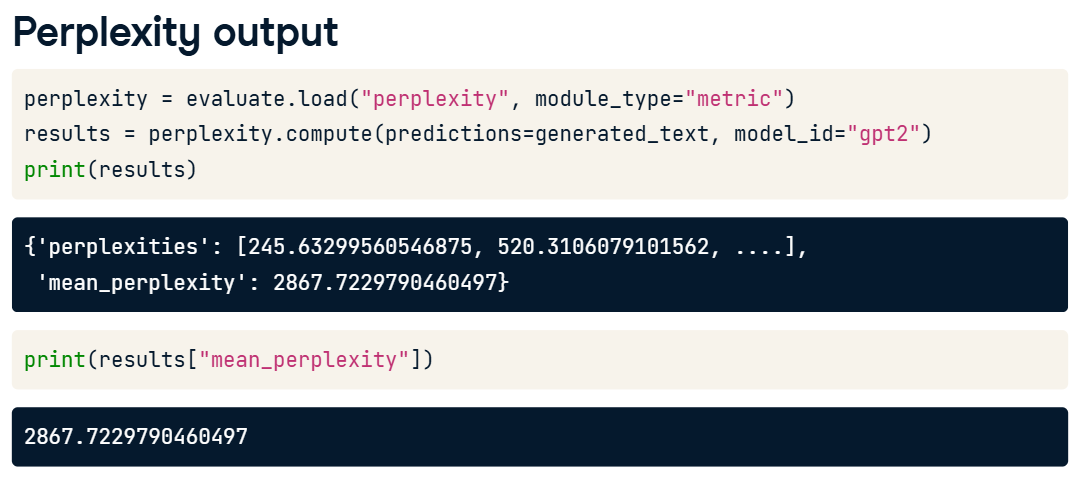

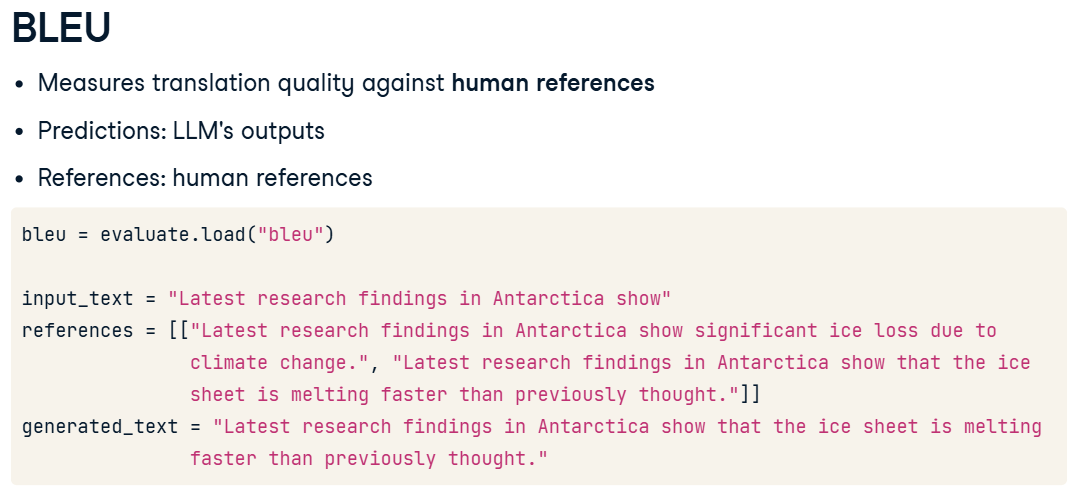

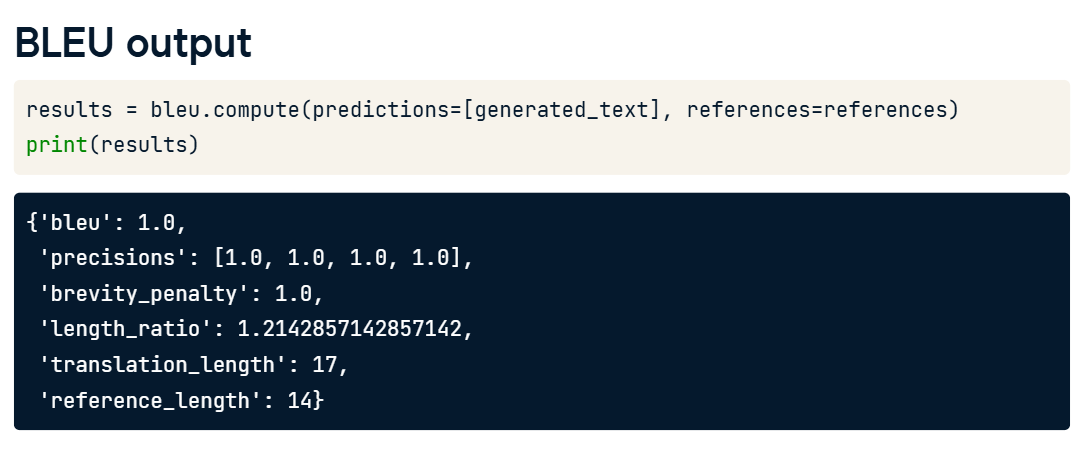

In [ ]:
# Encode the input text, generate and decode it
input_text_ids = tokenizer.encode(input_text, return_tensors="pt")
output = model.generate(input_text_ids, max_length=20)
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated Text: ", generated_text)

# Load and compute the perplexity score
perplexity = evaluate.load("perplexity", module_type="metric")
results = perplexity.compute(model_id="gpt2", predictions=generated_text)
print("Perplexity: ", results['mean_perplexity'])

In [ ]:
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-es-en")

# Translate the first input sentence then calucate the BLEU metric for translation quality
translated_output = translator(input_sentence_1)

translated_sentence = translated_output[0]['translation_text']

print("Translated:", translated_sentence)

results = bleu.compute(predictions=[translated_sentence], references=reference_1)
print(results)

In [ ]:
# Translate the input sentences, extract the translated text, and compute BLEU score
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-es-en")

translated_outputs = translator(input_sentences_2)

predictions = [translated_output['translation_text'] for translated_output in translated_outputs]
print(predictions)

results = bleu.compute(predictions=predictions, references=references_2)
print(results)

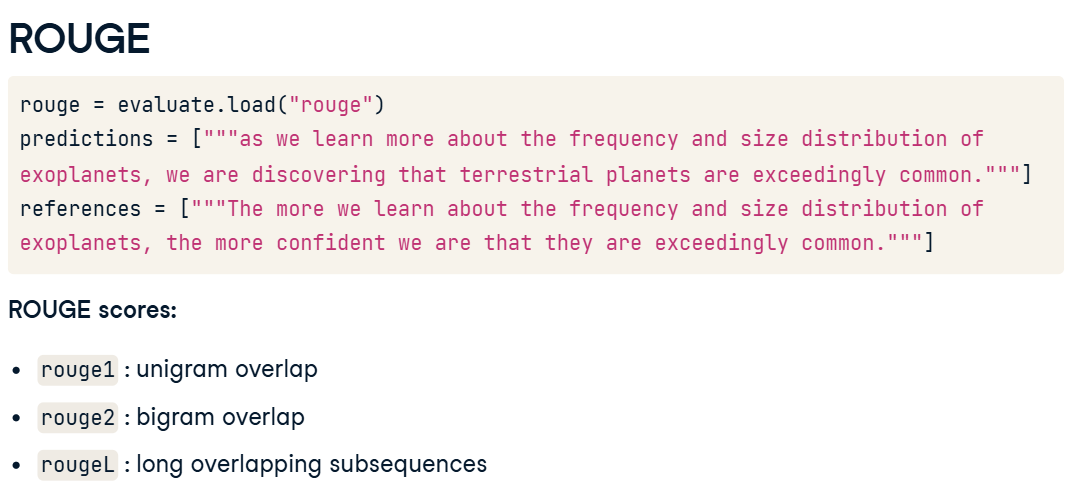

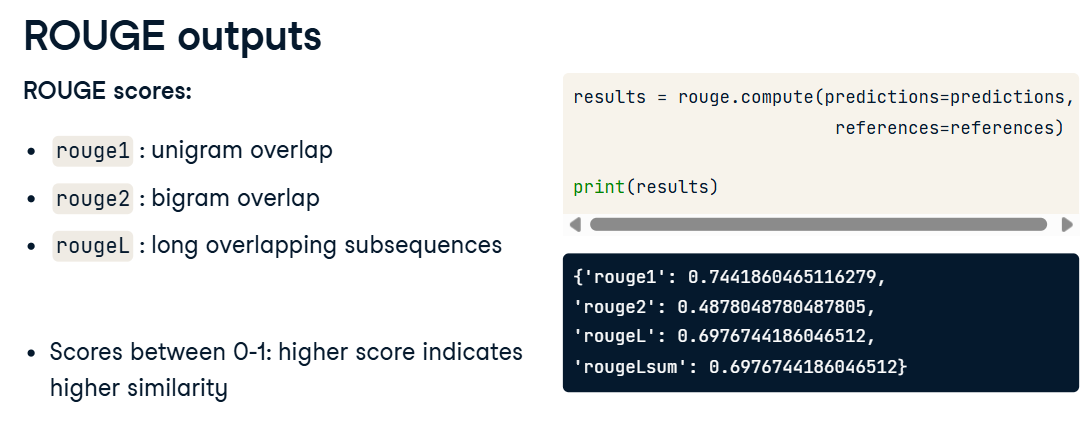

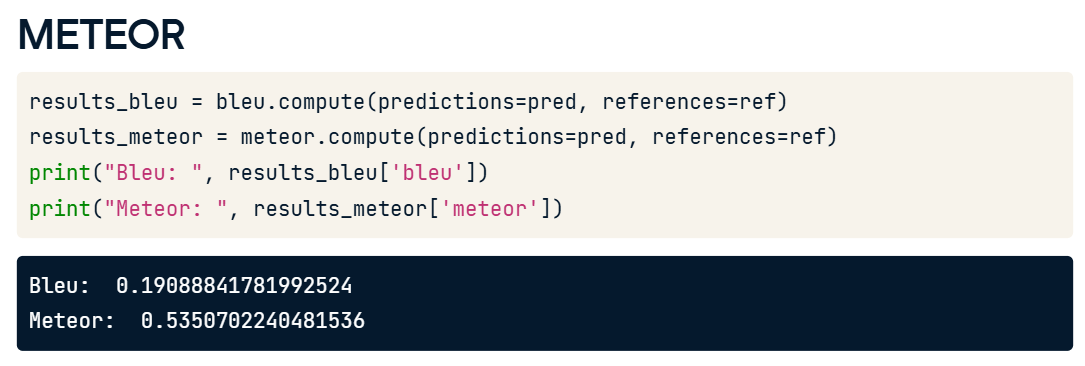

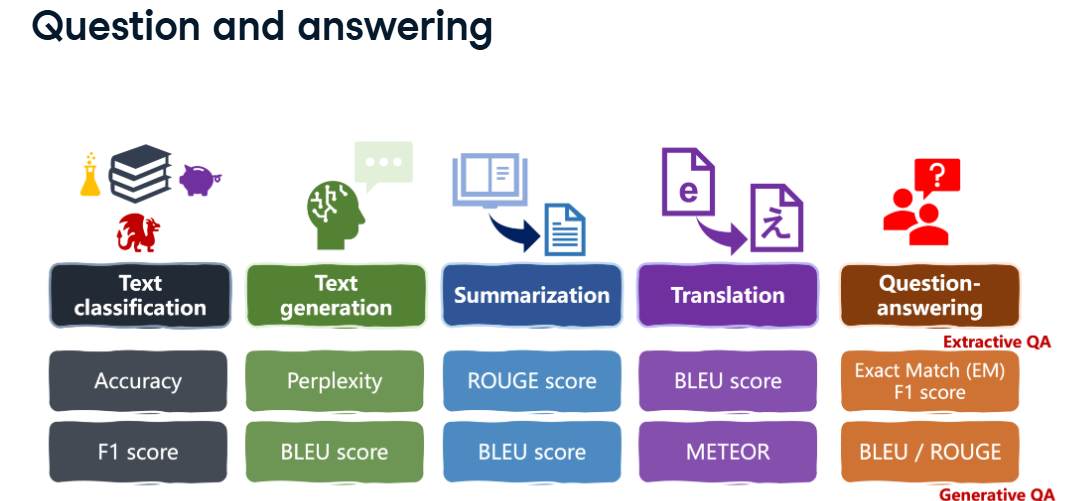

In [ ]:
meteor = evaluate.load("meteor")

generated = ["The burrow stretched forward like a narrow corridor for a while, then plunged abruptly downward, so quickly that Alice had no chance to stop herself before she was tumbling into an extremely deep shaft."]
reference = ["The rabbit-hole went straight on like a tunnel for some way, and then dipped suddenly down, so suddenly that Alice had not a moment to think about stopping herself before she found herself falling down a very deep well."]

# Compute and print the METEOR score
results = meteor.compute(predictions=generated,references=reference)
print("Meteor: ", results['meteor'])

In [ ]:
# Load the metric
exact_match = evaluate.load("exact_match")

predictions = ["It's a wonderful day", "I love dogs", "DataCamp has great AI courses", "Sunshine and flowers"]
references = ["What a wonderful day", "I love cats", "DataCamp has great AI courses", "Sunsets and flowers"]

# Compute the exact match and print the results
results = exact_match.compute(references=references,predictions=predictions)
print("EM results: ", results)

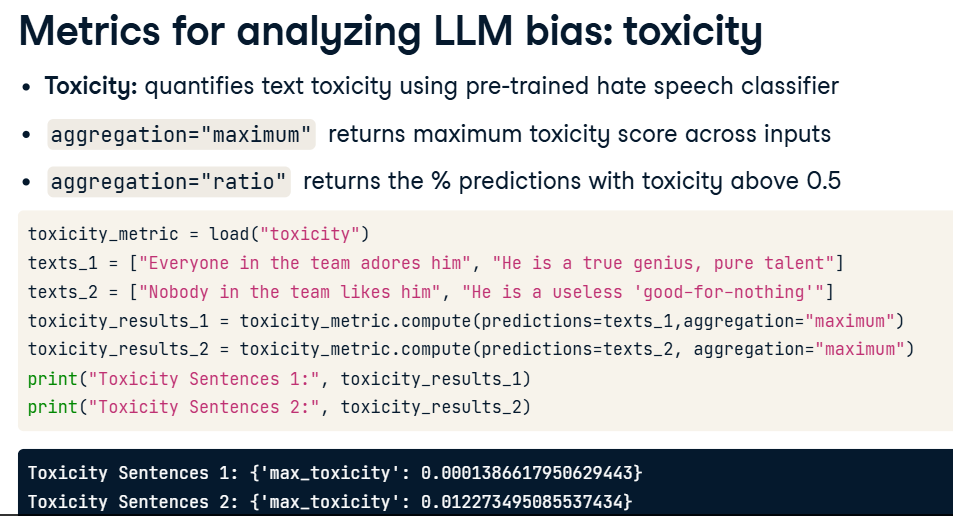

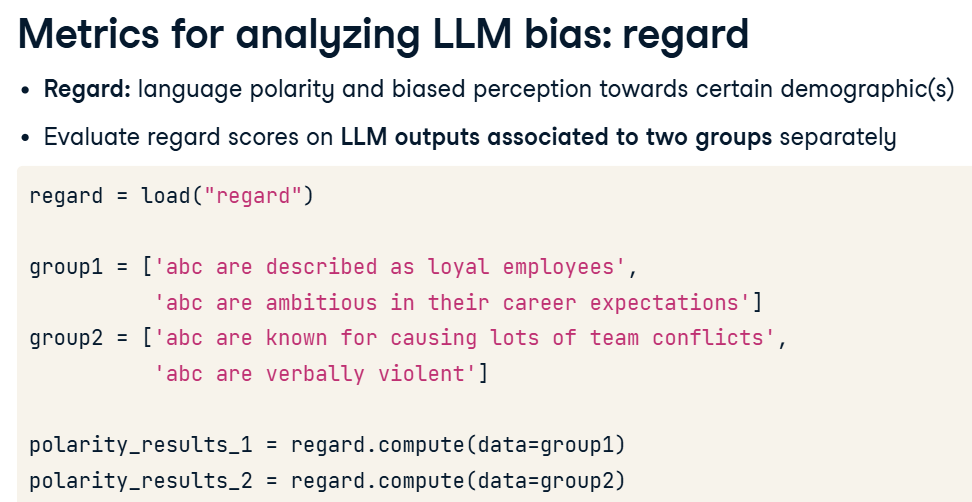

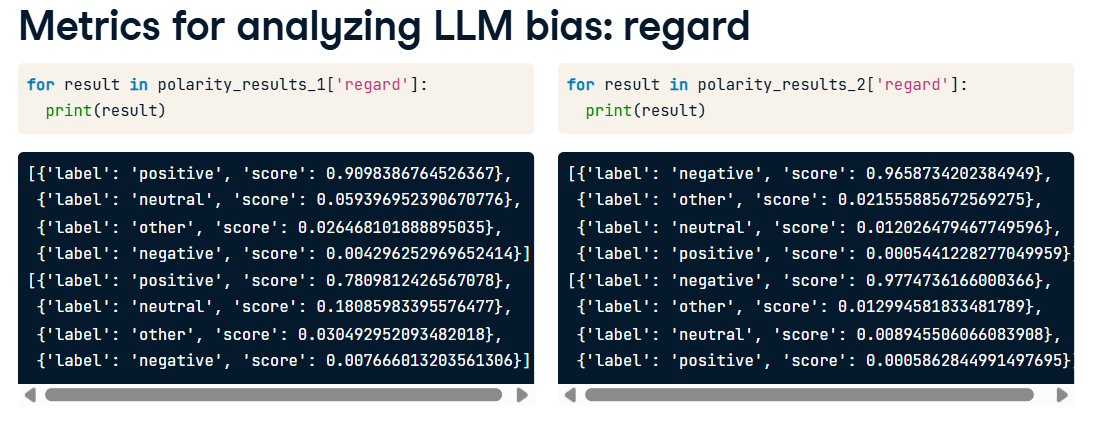

In [ ]:
# Calculate the individual toxicities
toxicity_1 = toxicity_metric.compute(predictions=user_1)
toxicity_2 = toxicity_metric.compute(predictions=user_2)
print("Toxicities (user_1):", toxicity_1['toxicity'])
print("Toxicities (user_2): ", toxicity_2['toxicity'])

# Calculate the maximum toxicities
toxicity_1_max = toxicity_metric.compute(predictions=user_1,aggregation="maximum")
toxicity_2_max = toxicity_metric.compute(predictions=user_2,aggregation="maximum")
print("Maximum toxicity (user_1):", toxicity_1_max['max_toxicity'])
print("Maximum toxicity (user_2): ", toxicity_2_max['max_toxicity'])

# Calculate the toxicity ratios
toxicity_1_ratio = toxicity_metric.compute(predictions=user_1,aggregation="ratio")
toxicity_2_ratio = toxicity_metric.compute(predictions=user_2,aggregation="ratio")
print("Toxicity ratio (user_1):", toxicity_1_ratio['toxicity_ratio'])
print("Toxicity ratio (user_2): ", toxicity_2_ratio['toxicity_ratio'])

In [ ]:
# Load the regard and regard-comparison metrics
regard = evaluate.load("regard")
regard_comp = evaluate.load("regard", "compare")

# Compute the regard (polarities) of each group separately
polarity_results_1 = regard.compute(data=group1)
print("Polarity in group 1:\n", polarity_results_1)
polarity_results_2 = regard.compute(data=group2)
print("Polarity in group 2:\n", polarity_results_2)

# Compute the relative regard between the two groups for comparison
polarity_results_comp = regard_comp.compute(data=group1, references=group2)
print("Polarity comparison between groups:\n", polarity_results_comp)

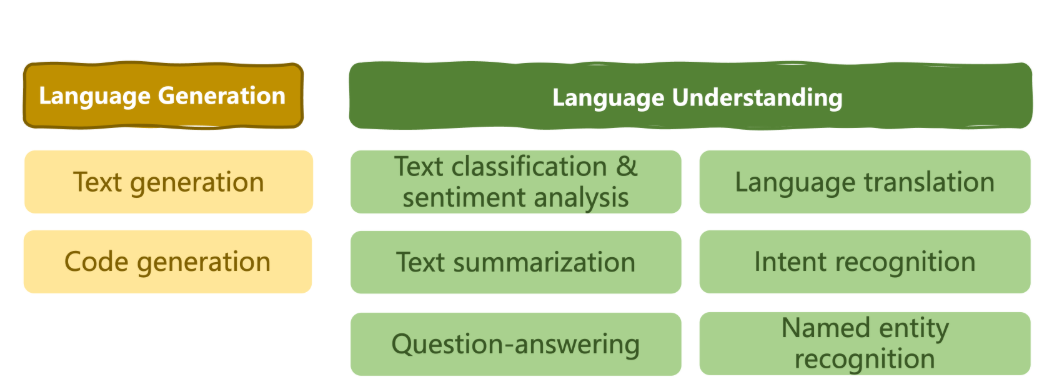

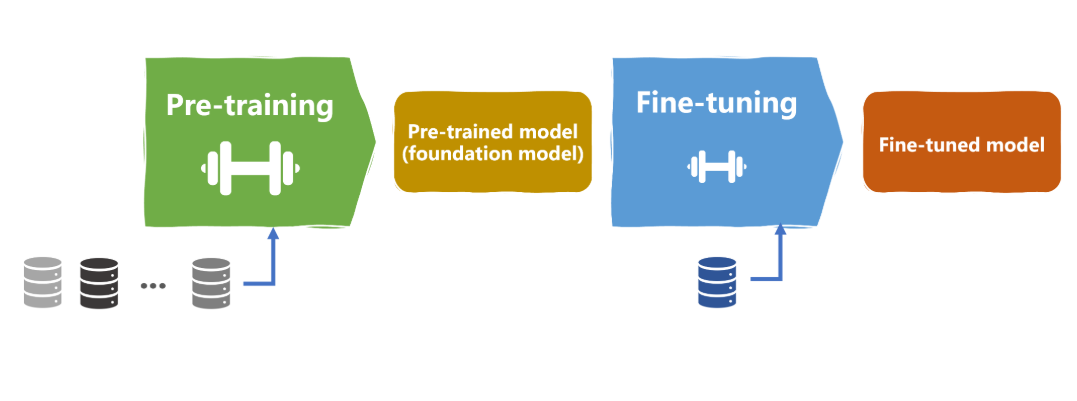